In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import xarray as xr
import pandas as pd

plt.style.use('sci_style.py') 
import robust_wm_stsp.lightning_helper as helper #import decoder,do_info_over_trials,distance_between_rnn_samples,distance_between_rnn_distracted_and_undistracted,get_max_min_similar,do_LDA_neural_data

from robust_wm_stsp.lightning_networks import dDMTSNet
from robust_wm_stsp.lightning_task import dDMTSDataModule
import robust_wm_stsp.utils as utils

%load_ext autoreload
%autoreload 2

In [5]:
tester = helper.load_val_tester()

In [2]:
loaded_dict = utils.pickle_load('/home/leo/ExpStableDynamics/plos_comp_bio_rebuttal/Robust_WM_STSP/results/robustness_and_info2.pkl')
df = pd.DataFrame.from_dict(loaded_dict)

In [150]:
rnn_types = np.asarray(loaded_dict['rnn_type'])
nls = np.asarray(loaded_dict['nl'])
hs = np.asarray(loaded_dict['hs'])
structural_robustness = np.asarray(loaded_dict['struct_robustness'])
process_robustness = np.asarray(loaded_dict['proc_robustness'])
param_regs = np.asarray(loaded_dict['param_reg'])
act_regs = np.asarray(loaded_dict['act_reg'])
val_acc = np.asarray(loaded_dict['val_acc'])
epochs = np.asarray(loaded_dict['epoch'])
gammas = np.asarray(loaded_dict['gamma'])
corrs = np.asarray(loaded_dict['corrs'])

In [151]:
vRNN_tanh_inds = np.where((rnn_types == 'vRNN') & (nls == 'tanh') & (val_acc > 0.8) )[0]
vRNN_relu_inds = np.where((rnn_types == 'vRNN') & (nls == 'relu') & (val_acc > 0.8))[0]
stsp_inds= np.where((rnn_types == 'stsp') & (nls == 'relu') & (val_acc > 0.8))[0]
ah_inds= np.where((rnn_types == 'ah') & (nls == 'none')) [0]

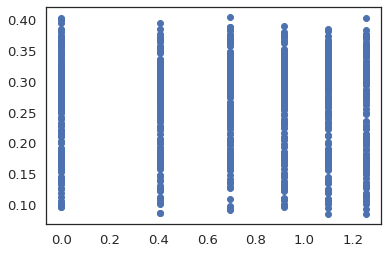

In [182]:
#plt.scatter(np.log(gammas[ah_inds]),corrs[ah_inds,-1])
x = np.log(act_regs[ah_inds]+1)
y = structural_robustness[ah_inds]
r, p = stats.pearsonr(x, y)
plt.scatter(x,y)



In [4]:
from scipy import stats

rnn_names = ['vRNN_relu','vRNN_tanh','stsp','ah']
independent_vars = ['hs','param_reg','act_reg']
dependent_vars = ['struct_robustness','proc_robustness','epoch','corrs']

dict_all = {'Independent Variable':[],
'Dependent Variable': [],
'RNN Type': [],
'Correlation (Pearson)': [],
'p_value': []}

for ind_var in independent_vars:
    for dep_var in dependent_vars:
        for rnn_name in rnn_names:

            if rnn_name == 'vRNN_relu':
                rnn_inds = np.where((rnn_types == 'vRNN') & (nls == 'relu'))[0]
            if rnn_name == 'vRNN_tanh':
                rnn_inds = np.where((rnn_types == 'vRNN') & (nls == 'tanh'))[0]
            if rnn_name == 'stsp':
                rnn_inds= np.where((rnn_types == 'stsp') & (nls == 'relu'))[0]           
            if rnn_name == 'ah':
                rnn_inds= np.where((rnn_types == 'ah') & (nls == 'none'))[0]        

            x = np.asarray(loaded_dict[ind_var])
            x = x[rnn_inds]  

            y = np.asarray(loaded_dict[dep_var])                
            y = y[rnn_inds] 

            if dep_var == 'corrs':
                y = y[:,-1]
                none_nan_inds = ~np.isnan(y)
                y = y[none_nan_inds] 
                x = x[none_nan_inds]            

            r, p = stats.pearsonr(x, y)

            dict_all['Independent Variable'].append(ind_var)
            dict_all['Dependent Variable'].append(dep_var)
            dict_all['RNN Type'].append(rnn_name)
            dict_all['Correlation (Pearson)'].append(r)
            if p <= .05:
                dict_all['p_value'].append('*')
            else:
                dict_all['p_value'].append('')



        #print(r)


df_2 = pd.DataFrame.from_dict(dict_all)
df_2

,Independent Variable,Dependent Variable,RNN Type,Correlation (Pearson),p_value
0,hs,struct_robustness,vRNN_relu,0.062357,
1,hs,struct_robustness,vRNN_tanh,0.874890,*
2,hs,struct_robustness,stsp,0.232346,*
3,hs,struct_robustness,ah,0.615554,*
4,hs,proc_robustness,vRNN_relu,-0.177242,*
5,hs,proc_robustness,vRNN_tanh,0.832026,*
6,hs,proc_robustness,stsp,-0.227312,*
7,hs,proc_robustness,ah,-0.339670,*
8,hs,epoch,vRNN_relu,0.320327,*
9,hs,epoch,vRNN_tanh,0.865318,*


In [142]:
import seaborn as sns

def make_group_barplot(df_2,which_dep_var,ax):


    if which_dep_var == 'corrs':
        title2set =  'hyperparameters' + ' vs ' + 'PFC-RNN similarity'
    else:
        title2set =  'hyperparameters' + ' vs ' + which_dep_var


    struct_dep = df_2.loc[(df_2['RNN Type'] == 'ah') & (df_2['Dependent Variable'] == which_dep_var) & (df_2['p_value'] == '*')]

    #set seaborn plotting aesthetics
    sns.set(style='white',font_scale=1.2)

    #create grouped bar chart
    new_ax = sns.barplot(x='Independent Variable', y='Correlation (Pearson)', hue='RNN Type', data=struct_dep,linewidth=2,edgecolor=".1",ax = ax)#.
    new_ax.set_title(title2set)
    new_ax.set(xlabel='')

    ps = df_2['p_value'].loc[(df_2['Dependent Variable'] == which_dep_var)]


def make_gammas_barplot(df_2,which_dep_var):




    struct_dep = df_2.loc[(df_2['Dependent Variable'] == which_dep_var) & (df_2['p_value'] == '*')]

    #set seaborn plotting aesthetics
    sns.set(style='white',font_scale=1.2)

    #create grouped bar chart
    new_ax = sns.barplot(x='Independent Variable', y='Correlation (Pearson)', hue='RNN Type', data=struct_dep,linewidth=2,edgecolor=".1",ax = ax)#.
    #new_ax.set_title(title2set)
    new_ax.set(xlabel='')

    ps = df_2['p_value'].loc[(df_2['Dependent Variable'] == which_dep_var)]




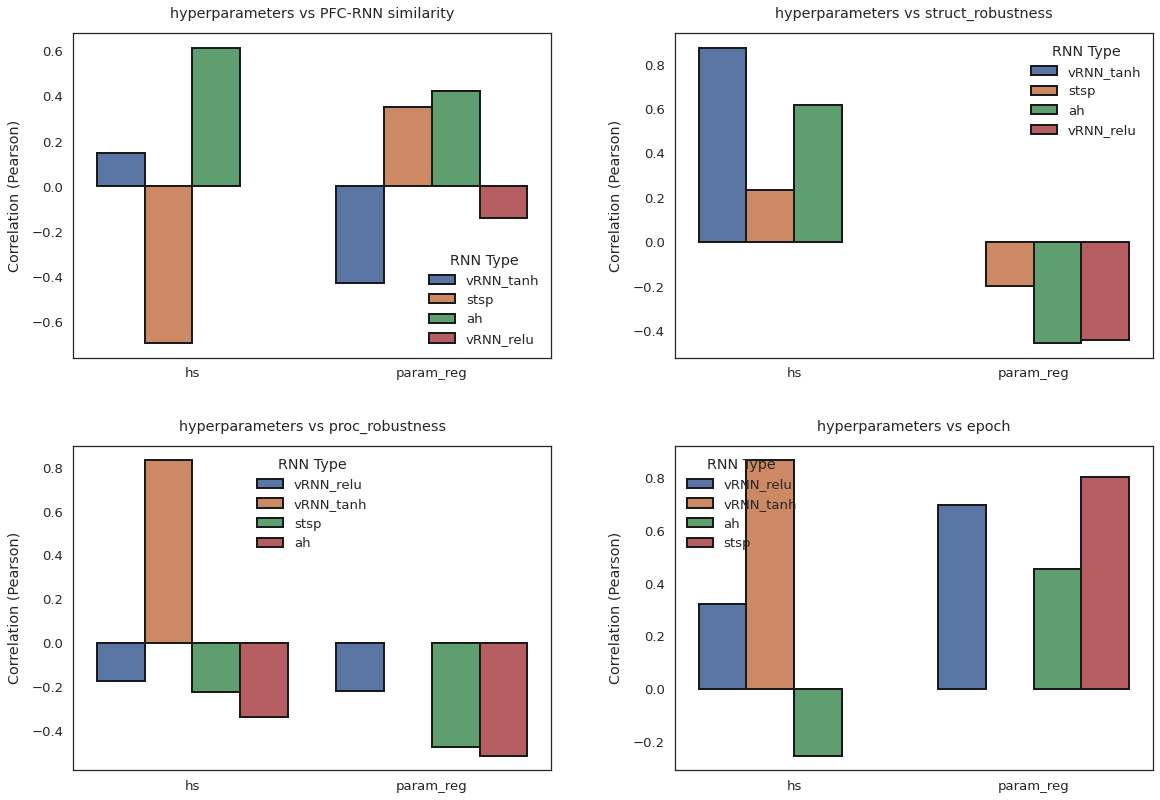

In [146]:
fig2 = plt.figure(constrained_layout=True,figsize = (16,11))

grid = gridspec.GridSpec(2, 2, wspace=.1, hspace=.1,figure = fig2)



h_vs_corrs = fig2.add_subplot(grid[0, 0])
make_group_barplot(df_2,'corrs',h_vs_corrs)

h_vs_structural_robustness = fig2.add_subplot(grid[0, 1])
make_group_barplot(df_2,'struct_robustness',h_vs_structural_robustness)

h_vs_process_robustness = fig2.add_subplot(grid[1, 0])
make_group_barplot(df_2,'proc_robustness',h_vs_process_robustness)

h_vs_epoch = fig2.add_subplot(grid[1, 1])
make_group_barplot(df_2,'epoch',h_vs_epoch)


#plt.savefig(f'/home/leo/ExpStableDynamics/plos_comp_bio_rebuttal/Robust_WM_STSP/results/figs/hyperparameters_vs_everything.png',dpi = 300)

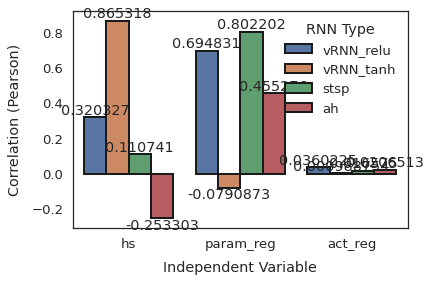

In [103]:
struct_dep = df_2.loc[(df_2['Dependent Variable'] == 'epoch')]

#set seaborn plotting aesthetics
sns.set(style='white',font_scale=1.2,)

#create grouped bar chart
ax = sns.barplot(x='Independent Variable', y='Correlation (Pearson)', hue='RNN Type', data=struct_dep,linewidth=2,edgecolor=".1")#.
#ax.set_title(title2set)

ps = df_2['p_value'].loc[(df_2['Dependent Variable'] == 'epoch')]



In [110]:


c = container.datavalues
c

array([-0.25330291,  0.45527606,  0.02065131])

In [64]:
r, p = stats.pearsonr(hs[ah_inds],structural_robustness[ah_inds])
p

1.1773042117463852e-114

In [41]:
most_brain_similar_ah, least_brain_similar = helper.get_max_min_similar(corrs, ah_inds)
model_ah = helper.get_model_from_index(df,most_brain_similar_ah)
distances_ah = helper.distance_between_rnn_samples(model_ah,tester)


most_brain_similar_stsp, least_brain_similar = helper.get_max_min_similar(corrs, stsp_inds)
model_stsp = helper.get_model_from_index(df,most_brain_similar_stsp)
distances_stsp = helper.distance_between_rnn_samples(model_stsp,tester)

/home/leo/ExpStableDynamics/plos_comp_bio_rebuttal/Robust_WM_STSP/scripts/_lightning_sandbox/checkpoints/rnn=ah--nl=none--hs=100--act_reg=2.0--gamma=0.001--param_reg=0.0001--epoch=31--val_acc=0.95.ckpt
/home/leo/ExpStableDynamics/plos_comp_bio_rebuttal/Robust_WM_STSP/scripts/_lightning_sandbox/checkpoints/rnn=stsp--nl=relu--hs=200--act_reg=0.0--gamma=0.005--param_reg=0.001--epoch=11--val_acc=0.95.ckpt


In [6]:
neural_data = utils.pickle_load('/home/leo/ExpStableDynamics/plos_comp_bio_rebuttal/Robust_WM_STSP/data/1203_lda_data_dandnd.pickle')

In [7]:
return_dict = helper.do_LDA_neural_data(neural_data)

In [9]:
lda_dict_tanh = helper.get_most_similar_LDA(corrs,vRNN_tanh_inds,tester,df,neurs = True)
lda_dict_relu = helper.get_most_similar_LDA(corrs,vRNN_relu_inds,tester,df,neurs = True)

lda_dict_stsp_neur = helper.get_most_similar_LDA(corrs,stsp_inds,tester,df,neurs = True)
lda_dict_stsp_syn =helper.get_most_similar_LDA(corrs,stsp_inds,tester,df,neurs = False)


lda_dict_ah_neur = helper.get_most_similar_LDA(corrs,ah_inds,tester,df,neurs = True,model_name = 'ah')
lda_dict_ah_syn = helper.get_most_similar_LDA(corrs,ah_inds,tester,df,neurs = False,model_name = 'ah')

/home/leo/ExpStableDynamics/plos_comp_bio_rebuttal/Robust_WM_STSP/scripts/_lightning_sandbox/checkpoints/rnn=vRNN--nl=tanh--hs=900--act_reg=1.5--gamma=0.005--param_reg=0.001--epoch=32--val_acc=0.95.ckpt
/home/leo/ExpStableDynamics/plos_comp_bio_rebuttal/Robust_WM_STSP/scripts/_lightning_sandbox/checkpoints/rnn=vRNN--nl=relu--hs=900--act_reg=0.0--gamma=0.005--param_reg=0.001--epoch=07--val_acc=0.96.ckpt
/home/leo/ExpStableDynamics/plos_comp_bio_rebuttal/Robust_WM_STSP/scripts/_lightning_sandbox/checkpoints/rnn=stsp--nl=relu--hs=200--act_reg=0.0--gamma=0.005--param_reg=0.001--epoch=11--val_acc=0.95.ckpt
/home/leo/ExpStableDynamics/plos_comp_bio_rebuttal/Robust_WM_STSP/scripts/_lightning_sandbox/checkpoints/rnn=stsp--nl=relu--hs=200--act_reg=0.0--gamma=0.005--param_reg=0.001--epoch=11--val_acc=0.95.ckpt
/home/leo/ExpStableDynamics/plos_comp_bio_rebuttal/Robust_WM_STSP/scripts/_lightning_sandbox/checkpoints/rnn=ah--nl=none--hs=100--act_reg=2.0--gamma=0.001--param_reg=0.0001--epoch=31--val_

<ipython-input-38-9fd1f13811a3>:96: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig2.subplots_adjust(top = 0.88)


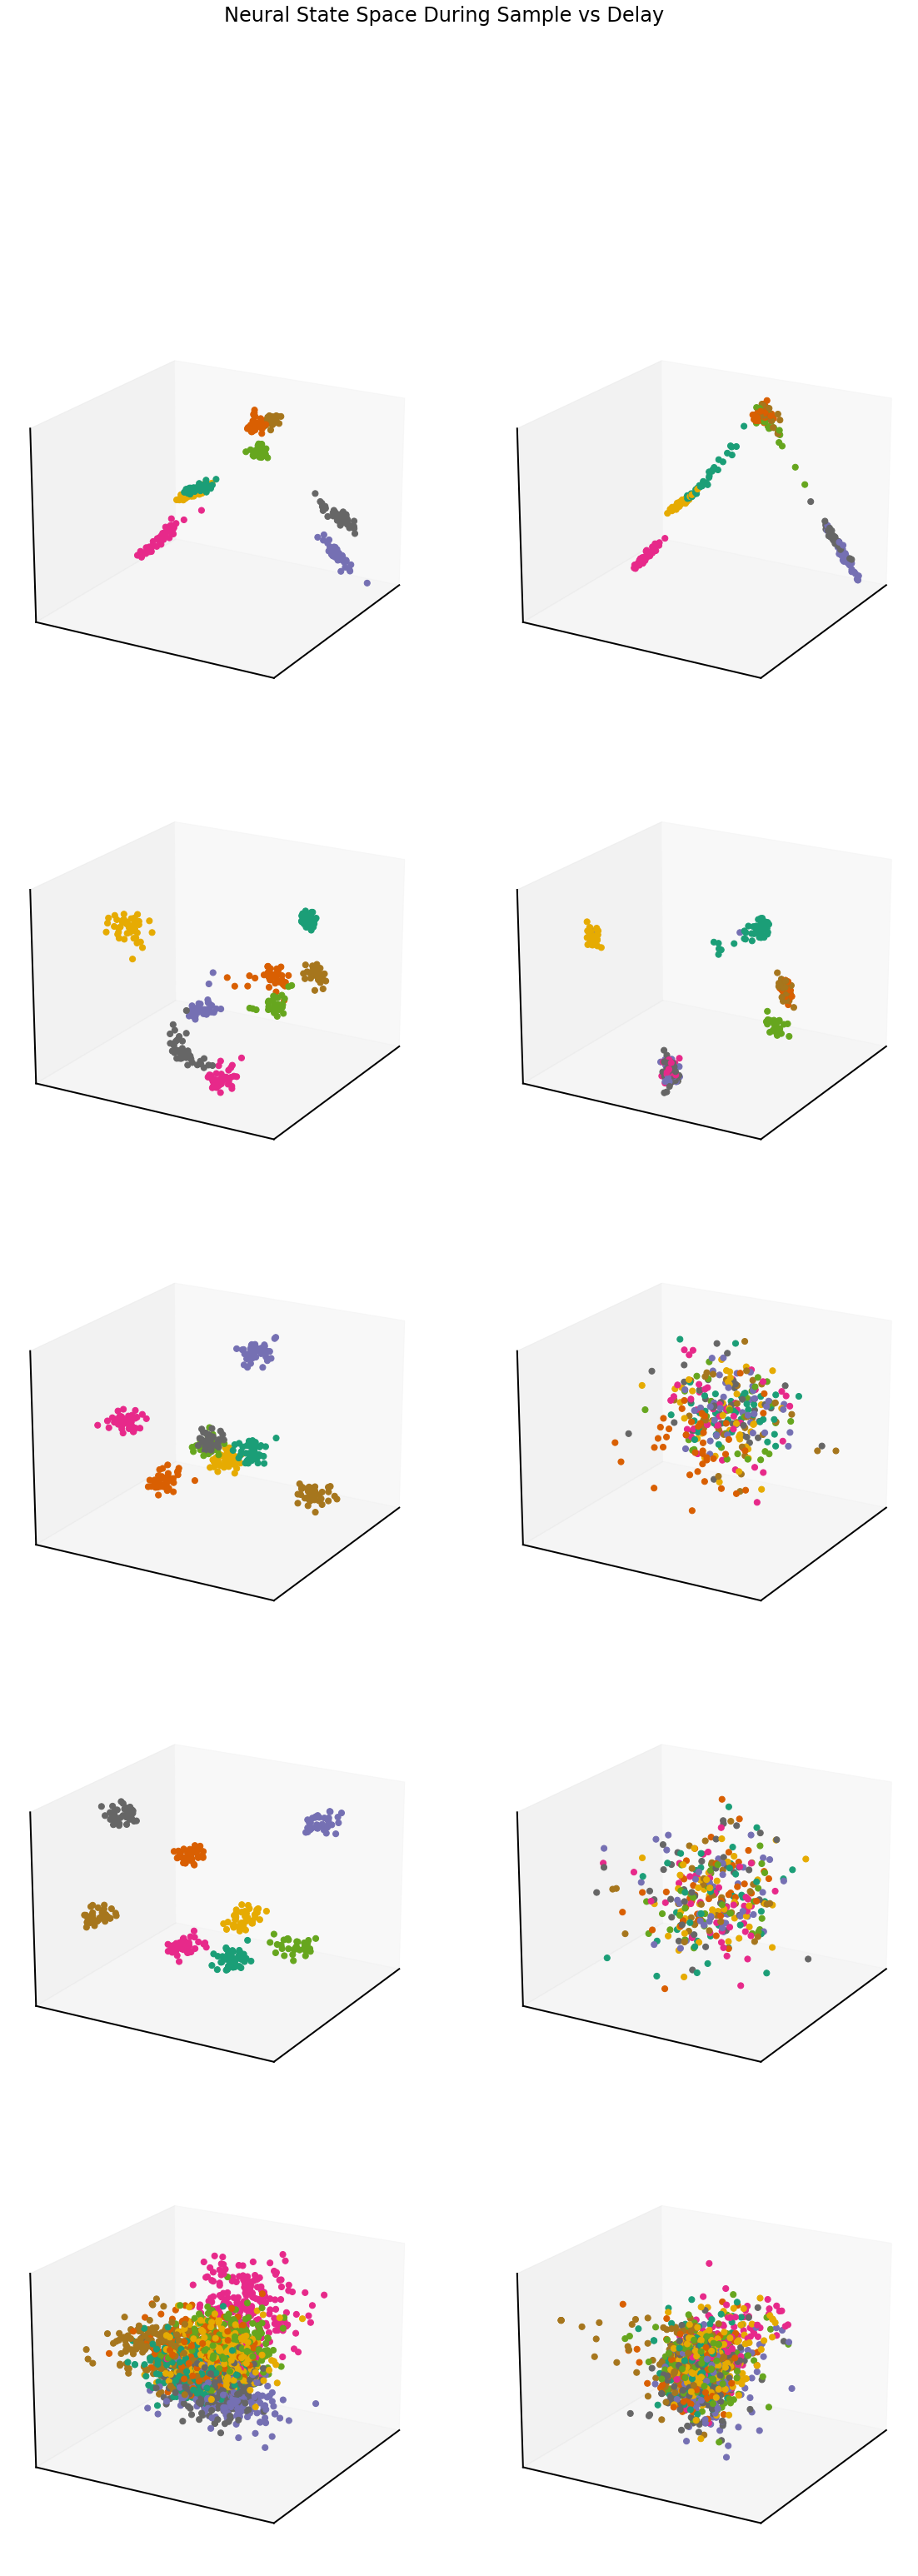

In [38]:
from matplotlib.colorbar import Colorbar

fig2 = plt.figure(constrained_layout=True,figsize = (20,50))

grid = gridspec.GridSpec(5, 2, wspace=.1, hspace=.1,figure = fig2)

#RELU########################

relu_scatter_sample = fig2.add_subplot(grid[0, 0],projection='3d')
#relu_scatter_sample.set_title('FS-relu')

relu_scatter_pretest = fig2.add_subplot(grid[0, 1],projection='3d')
#relu_scatter_pretest.set_title('FS-relu  \n Delay Period')


#TANH########################

tanh_scatter_sample = fig2.add_subplot(grid[1, 0],projection='3d')
#tanh_scatter_sample.set_title('FS-tanh')

tanh_scatter_pretest = fig2.add_subplot(grid[1, 1],projection='3d')
#tanh_scatter_pretest.set_title('FS-tanh \n Delay Period')


#STSP########################

stsp_scatter_sample = fig2.add_subplot(grid[2, 0],projection='3d')
#stsp_scatter_sample.set_title('PS-pre')


stsp_scatter_pretest = fig2.add_subplot(grid[2, 1],projection='3d')
#stsp_scatter_pretest.set_title('PS-stsp  \n Delay Period')


#AH########################

ah_scatter_sample = fig2.add_subplot(grid[3, 0],projection='3d')
#ah_scatter_sample.set_title('PS-hebb')



ah_scatter_pretest = fig2.add_subplot(grid[3, 1],projection='3d')
#ah_scatter_pretest.set_title('PS-ah \n Delay Period')


scatter_sample = fig2.add_subplot(grid[4, 0],projection='3d')
scatter_delay = fig2.add_subplot(grid[4, 1],projection='3d')

#scatter_sample.set_title('PFC')
#scatter_delay.set_title('PFC \n Delay Period')

alpha_scatter = 1
size = 50
cmap_scatter = 'Dark2'#'Dark2'

to_plot_sample = 'dim_red_out_sample'
c_plot_sample = 'y_repeat_sample'

to_plot_delay = 'dim_red_out_delay'
c_plot_delay = 'y_repeat_delay'

to_plot_pretest = 'dim_red_out_pretest'
c_plot_pretest = 'y_repeat_pretest'


def scatter_lda(ax,dict,to_plot,c_plot):
    
    ax.scatter(dict[to_plot][:,0],dict[to_plot][:,1],dict[to_plot][:,2],c = dict[c_plot],alpha = alpha_scatter, s = size,cmap = cmap_scatter)
    ax.view_init(elev = 20.,azim = 30)
    utils.remove_all_ticks(ax)


def scatter_both_time_periods(ax1,ax2,dict):

    scatter_lda(ax1, dict,'dim_red_out_sample','y_repeat_sample')
    scatter_lda(ax2,dict,'dim_red_out_pretest','y_repeat_pretest')

def scatter_both_time_periods_data(ax1,ax2,dict):

    scatter_lda(ax1,dict,'samp','y')
    scatter_lda(ax2,dict,'pre_test','y')


scatter_both_time_periods(relu_scatter_sample,relu_scatter_pretest, lda_dict_relu)

scatter_both_time_periods(tanh_scatter_sample,tanh_scatter_pretest, lda_dict_tanh)

scatter_both_time_periods(stsp_scatter_sample,stsp_scatter_pretest, lda_dict_stsp_neur)

scatter_both_time_periods(ah_scatter_sample,ah_scatter_pretest, lda_dict_ah_neur)

scatter_both_time_periods_data(scatter_sample,scatter_delay,return_dict)


fig2.suptitle('Neural State Space During Sample vs Delay')
fig2.subplots_adjust(top = 0.88)

plt.savefig(f'/home/leo/ExpStableDynamics/plos_comp_bio_rebuttal/Robust_WM_STSP/results/figs/neural_state_spaces_vert.png',dpi = 300)


<ipython-input-28-cdb2097b102b>:21: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig2.subplots_adjust(top = 0.88)


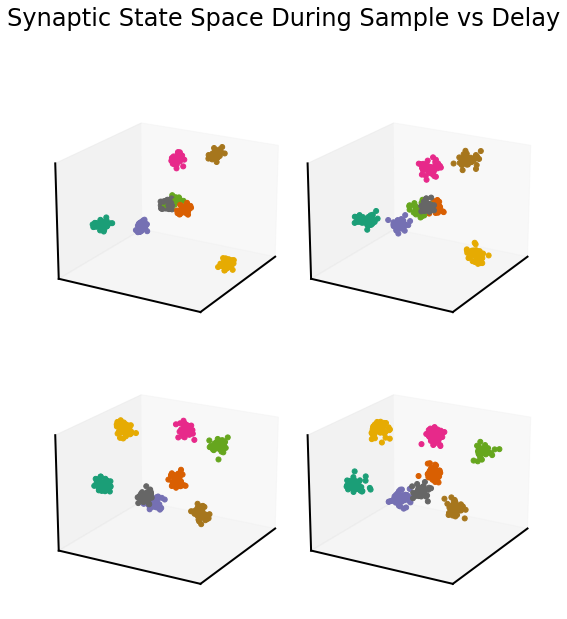

In [28]:
fig2 = plt.figure(constrained_layout=True,figsize = (9,10))

grid = gridspec.GridSpec(2, 2, wspace=.01, hspace=0,figure = fig2)

#RELU########################

stsp_scatter_sample = fig2.add_subplot(grid[0, 0],projection='3d')
#stsp_scatter_sample.set_title('PS-pre')
stsp_scatter_delay = fig2.add_subplot(grid[0, 1],projection='3d')

ah_scatter_sample = fig2.add_subplot(grid[1, 0],projection='3d')
#ah_scatter_sample.set_title('PS-hebb')
ah_scatter_delay = fig2.add_subplot(grid[1, 1],projection='3d')


scatter_both_time_periods(stsp_scatter_sample,stsp_scatter_delay, lda_dict_stsp_syn)

scatter_both_time_periods(ah_scatter_sample,ah_scatter_delay, lda_dict_ah_syn)

fig2.suptitle('Synaptic State Space During Sample vs Delay')
fig2.subplots_adjust(top = 0.88)

#plt.savefig(f'/home/leo/ExpStableDynamics/plos_comp_bio_rebuttal/Robust_WM_STSP/results/figs/synaptic_state_spaces_vert.png',dpi = 300)

In [34]:
info_curve_most_vrnn_tanh,info_curve_least_vrnn_tanh = helper.get_info_curves_from_inds(vRNN_tanh_inds)
info_curve_most_vrnn_relu,info_curve_least_vrnn_relu = helper.get_info_curves_from_inds(vRNN_relu_inds)
info_curve_most_stsp,info_curve_least_stsp = helper.get_info_curves_from_inds(stsp_inds)
info_curve_most_ah,info_curve_least_ah = helper.get_info_curves_from_inds(ah_inds)


/home/leo/ExpStableDynamics/plos_comp_bio_rebuttal/Robust_WM_STSP/scripts/_lightning_sandbox/checkpoints/rnn=vRNN--nl=tanh--hs=1000--act_reg=0.5--gamma=0.005--param_reg=0.01--epoch=37--val_acc=0.99.ckpt
/home/leo/ExpStableDynamics/plos_comp_bio_rebuttal/Robust_WM_STSP/scripts/_lightning_sandbox/checkpoints/rnn=vRNN--nl=tanh--hs=800--act_reg=0.0--gamma=0.005--param_reg=0.001--epoch=33--val_acc=0.95.ckpt
/home/leo/ExpStableDynamics/plos_comp_bio_rebuttal/Robust_WM_STSP/scripts/_lightning_sandbox/checkpoints/rnn=vRNN--nl=relu--hs=900--act_reg=0.5--gamma=0.005--param_reg=0.01--epoch=67--val_acc=0.96.ckpt
/home/leo/ExpStableDynamics/plos_comp_bio_rebuttal/Robust_WM_STSP/scripts/_lightning_sandbox/checkpoints/rnn=vRNN--nl=relu--hs=900--act_reg=0.0--gamma=0.005--param_reg=0.001--epoch=07--val_acc=0.96.ckpt
/home/leo/ExpStableDynamics/plos_comp_bio_rebuttal/Robust_WM_STSP/scripts/_lightning_sandbox/checkpoints/rnn=stsp--nl=relu--hs=1000--act_reg=0.0--gamma=0.005--param_reg=0.0001--epoch=06--va

In [51]:
info_curves = {'info_curve_most_vrnn_tanh': info_curve_most_vrnn_tanh,
'info_curve_least_vrnn_tanh': info_curve_least_vrnn_tanh,
'info_curve_most_vrnn_relu': info_curve_most_vrnn_relu,
'info_curve_least_vrnn_relu': info_curve_least_vrnn_relu,
'info_curve_most_stsp': info_curve_most_stsp,
'info_curve_least_stsp': info_curve_least_stsp,
'info_curve_most_ah': info_curve_most_ah,
'info_curve_least_ah': info_curve_least_ah
}

#with open('info_curves.pkl', 'wb') as f:
    #pickle.dump(info_curves, f)

#plt.savefig('')

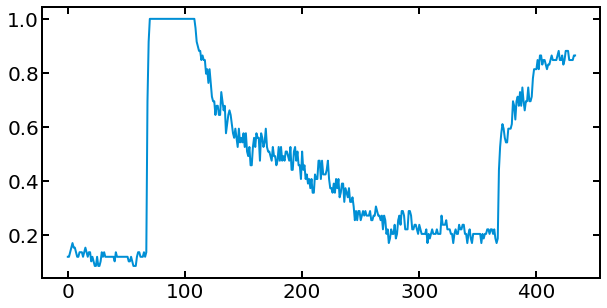

In [69]:
f1 = plt.figure()
plt.clf()
for key in info_curves.keys():   
    plt.plot(info_curves[key],linewidth = 5)
    plt.savefig(f'/home/leo/ExpStableDynamics/plos_comp_bio_rebuttal/Robust_WM_STSP/results/figs/{key}.svg',dpi = 300)
    plt.clf()

<Figure size 720x360 with 0 Axes>

In [10]:

def plot_across_all_hyperparameters(x,y,vRNN_relu_inds,vRNN_tanh_inds,stsp_inds,ah_inds,xlab,ylab):

    fig2 = plt.figure(constrained_layout=True,figsize = (16,4))
    
    grid = gridspec.GridSpec(1, 6, wspace=1, hspace=1,figure = fig2)
    relu_scatter = plt.subplot(grid[0, 0])
    tanh_scatter = plt.subplot(grid[0, 1],sharey=relu_scatter)
    ps_pre_scatter = plt.subplot(grid[0, 2],sharey=relu_scatter)
    ps_hebb_scatter = plt.subplot(grid[0, 3],sharey=relu_scatter)
    bar_plot = plt.subplot(grid[0,4:6],sharey=relu_scatter)

    dot_color = 'k'
    dot_size = 40

    relu_scatter.scatter(x[vRNN_relu_inds],y[vRNN_relu_inds],s = dot_size, color = 'forestgreen')
    relu_scatter.set_xlabel(xlab)
    relu_scatter.set_ylabel(ylab)
    relu_scatter.set_title('FS-relu')
    #plt.setp(relu_scatter.get_yticklabels(), visible=False)

    tanh_scatter.scatter(x[vRNN_tanh_inds],y[vRNN_tanh_inds],s = dot_size, color = 'darkgoldenrod')
    tanh_scatter.set_xlabel(xlab)
    tanh_scatter.set_title('FS-tanh')
    plt.setp(tanh_scatter.get_yticklabels(), visible=False)

    ps_pre_scatter.scatter(x[stsp_inds],y[stsp_inds],s = dot_size, color = 'tab:red')
    ps_pre_scatter.set_xlabel(xlab)
    ps_pre_scatter.set_title('PS-pre')
    plt.setp(ps_pre_scatter.get_yticklabels(), visible=False)

    ps_hebb_scatter.scatter(x[ah_inds],y[ah_inds],s = dot_size, color = 'tab:blue')
    ps_hebb_scatter.set_xlabel(xlab)
    ps_hebb_scatter.set_title('PS-hebb')
    plt.setp(ps_hebb_scatter.get_yticklabels(), visible=False)

    bars = ['FS-relu','FS-tanh','PS-pre','PS-hebb']
    heights = [np.mean(y[vRNN_relu_inds]),np.mean(y[vRNN_tanh_inds]),np.mean(y[stsp_inds]),np.mean(y[ah_inds])]
    bar_plot.bar(bars,heights,color= ['forestgreen','darkgoldenrod','tab:red','tab:blue'])
    plt.setp(bar_plot.get_yticklabels(), visible=False)
    bar_plot.set_xticklabels(bars,rotation=30)
    bar_plot.set_title('Average \n' + ylab,fontsize = 15)
    #bar_plot.set_ylabel(ylab)

    plt.tight_layout

    
def plot_info_across_all_hyperparameters(x,y,subsample_idx,vRNN_relu_inds,vRNN_tanh_inds,stsp_inds,ah_inds,xlab,ylab):

    fig2 = plt.figure(constrained_layout=True,figsize = (16,4))
    
    grid = gridspec.GridSpec(1, 6, wspace=1, hspace=1,figure = fig2)
    relu_scatter = plt.subplot(grid[0, 0])
    tanh_scatter = plt.subplot(grid[0, 1],sharey=relu_scatter)
    ps_pre_scatter = plt.subplot(grid[0, 2],sharey=relu_scatter)
    ps_hebb_scatter = plt.subplot(grid[0, 3],sharey=relu_scatter)
    bar_plot = plt.subplot(grid[0,4:6],sharey=relu_scatter)

    dot_color = 'k'
    dot_size = 40

    y_stack_relu = np.stack(y[vRNN_relu_inds])
    relu_scatter.scatter(x[vRNN_relu_inds],y_stack_relu[:,subsample_idx], s = dot_size, color = 'forestgreen')
    relu_scatter.set_xlabel(xlab)
    relu_scatter.set_ylabel(ylab)
    relu_scatter.set_title('FS-relu')
    #plt.setp(relu_scatter.get_yticklabels(), visible=False)

    y_stack_tanh = np.stack(y[vRNN_tanh_inds])
    tanh_scatter.scatter(x[vRNN_tanh_inds],y_stack_tanh[:,subsample_idx],s = dot_size, color = 'darkgoldenrod')
    tanh_scatter.set_xlabel(xlab)
    tanh_scatter.set_title('FS-tanh')
    plt.setp(tanh_scatter.get_yticklabels(), visible=False)

    y_stack_pre = np.stack(y[stsp_inds])
    ps_pre_scatter.scatter(x[stsp_inds],y_stack_pre[:,subsample_idx],s = dot_size, color = 'tab:red')
    ps_pre_scatter.set_xlabel(xlab)
    ps_pre_scatter.set_title('PS-pre')
    plt.setp(ps_pre_scatter.get_yticklabels(), visible=False)

    y_stack_hebb = np.stack(y[ah_inds])
    ps_hebb_scatter.scatter(x[ah_inds],y_stack_hebb[:,subsample_idx],s = dot_size, color = 'tab:blue')
    ps_hebb_scatter.set_xlabel(xlab)
    ps_hebb_scatter.set_title('PS-hebb')
    plt.setp(ps_hebb_scatter.get_yticklabels(), visible=False)

    bars = ['FS-relu','FS-tanh','PS-pre','PS-hebb']
    heights = [np.nanmean(y_stack_relu[:,subsample_idx]),np.nanmean(y_stack_tanh[:,subsample_idx]),np.nanmean(y_stack_pre[:,subsample_idx]),np.nanmean(y_stack_hebb[:,subsample_idx])]
    bar_plot.bar(bars,heights,color= ['forestgreen','darkgoldenrod','tab:red','tab:blue'])
    plt.setp(bar_plot.get_yticklabels(), visible=False)
    bar_plot.set_xticklabels(bars,rotation=30)
    bar_plot.set_title('Average \n' + ylab,fontsize = 15)
    #bar_plot.set_ylabel(ylab)

    plt.tight_layout





<ipython-input-81-fa0549010e7f>:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot.set_xticklabels(bars,rotation=30)


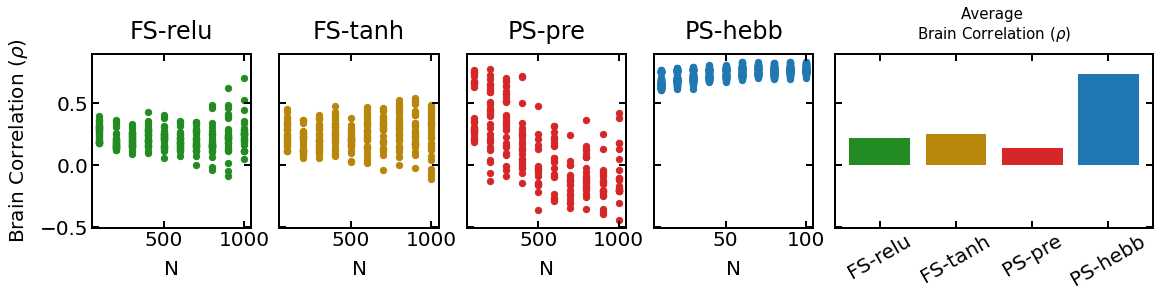

In [92]:
subsample_idx = 3
plot_info_across_all_hyperparameters(hs,corrs,subsample_idx,vRNN_relu_inds,vRNN_tanh_inds,stsp_inds,ah_inds,'N',r'Brain Correlation ($\rho$)')

plt.savefig('/home/leo/ExpStableDynamics/plos_comp_bio_rebuttal/Robust_WM_STSP/results/figs/brain_cor_ss3.svg',dpi = 300)

<ipython-input-8-fa0549010e7f>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot.set_xticklabels(bars,rotation=30)


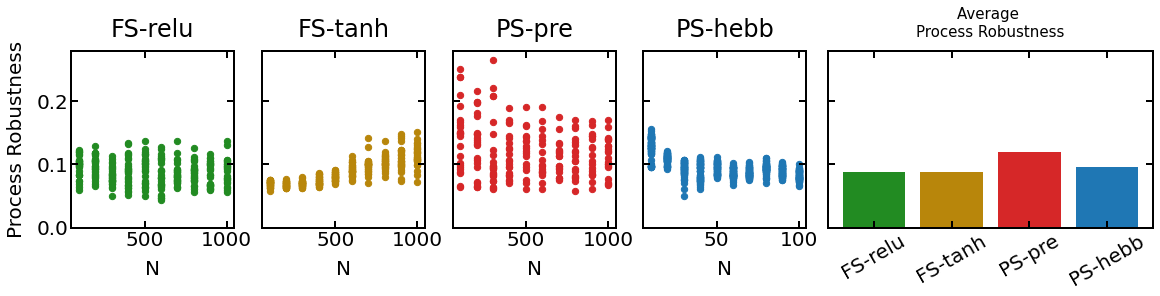

In [10]:
plot_across_all_hyperparameters(hs,process_robustness,vRNN_relu_inds,vRNN_tanh_inds,stsp_inds,ah_inds,'N','Process Robustness')
plt.savefig('/home/leo/ExpStableDynamics/plos_comp_bio_rebuttal/Robust_WM_STSP/results/figs/process_robustness.svg',dpi = 300)

<ipython-input-8-fa0549010e7f>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot.set_xticklabels(bars,rotation=30)


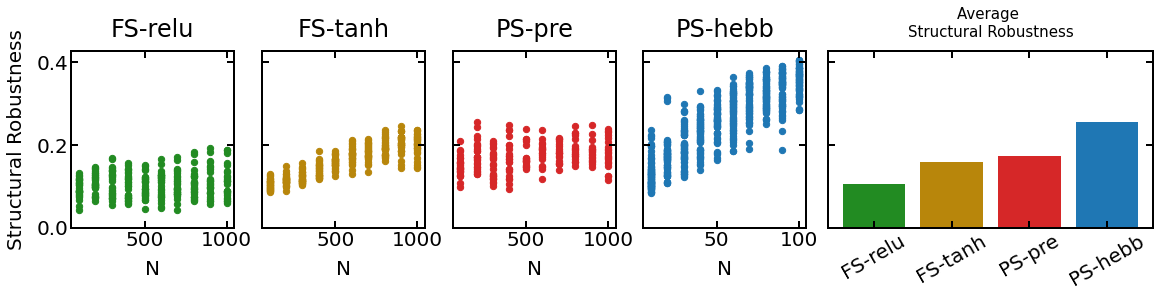

In [11]:
plot_across_all_hyperparameters(hs,structural_robustness,vRNN_relu_inds,vRNN_tanh_inds,stsp_inds,ah_inds,'N','Structural Robustness')
plt.savefig('/home/leo/ExpStableDynamics/plos_comp_bio_rebuttal/Robust_WM_STSP/results/figs/struct_robust.svg',dpi = 300)